In [7]:
from PIL import Image, ImageDraw
import numpy as np
import random

In [2]:
def color_generator():
    #Create pixel values for each channel in rgb image
    colors = list(np.random.randint(0,255,3))
    return ','.join(map(str,colors))   

def create_random_coordinates(max_y, max_x, width, height):
    x = np.random.randint(0,width,2)
    y = np.random.randint(0,height,2)
    
    coordinate = [x[0],y[0],
                  x[1],y[1]]
    
    if abs((y[0]-y[1])) <= max_y and abs((x[0]-x[1])) <= max_x:
        return coordinate
    else:
        return create_random_coordinates(max_y, max_x, width, height)
    
def dotplotter(x_interval, y_interval, start, fill):
    
    option = random.choices(range(4), weights=[.4,.15,.15,.3])
    #print("first:", start)
    if option==0:
        start[option] = start[option+2]+x_interval 
    if option==1:
        start[option] = start[option+2]+y_interval 
    if option==2:
        start[option] = start[option-2]+x_interval 
    if option==3:
        start[option] = start[option-2]+y_interval 
        
    #draw.ellipse(start, fill=fill)
    #print("last:", start)
    
    return
    

# Example 1

In [65]:
x_offset = y_offset = 30 #empty border

w = 500+(2*x_offset)
h = 700+(2*y_offset)

canvas2 = Image.new(size=(w,h), mode='RGBA', color='white')
draw2 = ImageDraw.Draw(canvas2)

In [66]:
color_generator()

'204,139,145'

In [67]:
def draw_line_by_pixel(coordinate, length, direction, color, alpha):
    x1 = coordinate[0][0]
    y1 = coordinate[0][1]
    
    #Extend the sides left or right from initial point (allows variation)
    
    draw2.point((x1,y1), fill=tuple(color))
    
    if direction == 'right':
        for i in range(length):
            color[3] = alpha
            if i % 10:
                alpha -= i
            x1 += 1
            draw2.point((x1,y1), fill=tuple(color))
            
    if direction == 'left':
        for i in range(length):
            color[3] = alpha
            if i % 10:
                alpha -= i
            x1 -= 1
            draw2.point((x1,y1), fill=tuple(color))

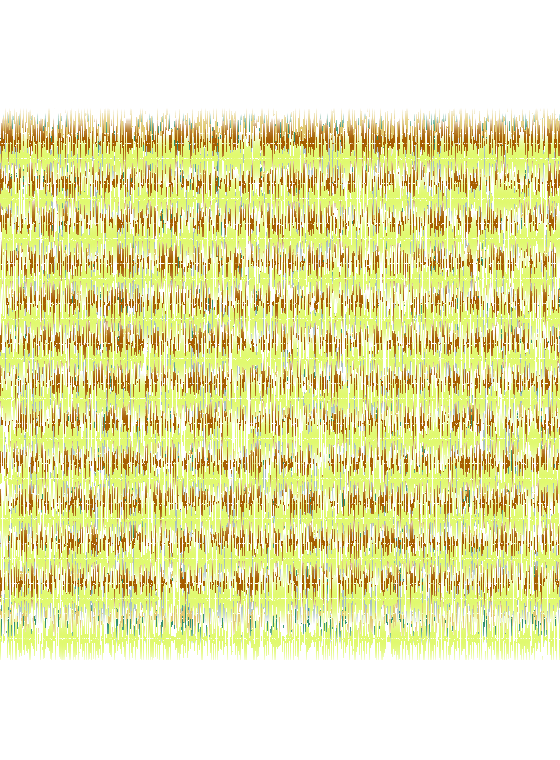

In [68]:
#max_line_width = 100
#generate_length = int(round(np.random.normal(70-40)))

n_colors = [10, 15,30,45,- 10]
colors = [[167, 95, 0, 255],
          [167, 192, 192, 255],
          [225, 250, 111, 255],
          [225, 200, 111, 255],
          [48, 144, 111, 255]]

random.shuffle(colors)

for j,c in enumerate(n_colors):

    start_xs = np.arange(x_offset+c, w-x_offset, 40)

    color = colors[j]

    #For every vertical axis
    for x in start_xs:

        #color = list(np.random.randint(0,255,3))
        alpha = 255

        #Start the first horizontal line at the offset
        #coordinate=random.choices([(x,y_offset),(x+1,y_offset), (x,y_offset+1), (x-1,y_offset)], weights=(.25,.25,.25,.25))

        #For every horizontal line on the axis
        for i in np.arange(y_offset, h-y_offset):

            #new length every iteration
            line_length = int(round(np.random.exponential(70-40)))
            line_length = int(round(line_length/2))

            coordinate=random.choices([[x,i], [x+1,i], [x-1,i], [x,i+1]], weights=(.1,.8,.05,.05))

            #Extend 

            draw_line_by_pixel(coordinate=coordinate, length=line_length, direction='right', color=color, alpha=alpha)
            draw_line_by_pixel(coordinate=coordinate, length=line_length, direction='left', color=color, alpha=alpha)

canvas2.rotate(90)

In [64]:
canvas2.save('grass.png', 'png')

In [36]:
coordinate=random.choices([[x,i], [x+1,i], [x-1,i], [x,i+1]], weights=(.25,.25,.25,.25))
print(coordinate)

[[40, 30]]
